## WEB MAPPING-Assignment 2
*Name: Pavan Manthalabu*

*Student ID: 201761796*

#### <u>Introduction:</u>

* The above code snippets present many methods for visualising New York City Airbnb listings. In the first, users may choose boroughs and room kinds through dynamic exploration using interactive widgets and Folium maps. The second offers a conventional 2D visualisation with a static scatter plot created using Matplotlib.The final sample, which blends simplicity and interactivity, offers a static scatter plot map using Folium. Users may analyse and examine data about Airbnb listings in accordance with their needs and preferences thanks to a variety of approaches that cater to diverse user preferences. These approaches range from interactive dashboards to simple visualisations.



In [29]:
import folium
from folium.plugins import MarkerCluster
import pandas as pd
from ipywidgets import interact, widgets
from IPython.display import display

# Load the Airbnb data from the CSV file
file_path = 'AB_NYC_2019.csv'  # Replace this with your actual file path
airbnb_data = pd.read_csv(file_path)

# Function to add markers for the selected borough
def add_markers(borough, room_type):
    # Filter listings by selected borough and room type
    filtered_listings = airbnb_data[(airbnb_data['neighbourhood_group'] == borough) & 
                                    (airbnb_data['room_type'] == room_type)]

    # Determine the center of the selected borough's listings for initial map focus
    center_lat = filtered_listings['latitude'].mean()
    center_lon = filtered_listings['longitude'].mean()

    # Create a new map instance centered on the calculated mean latitude and longitude
    this_map = folium.Map(location=[center_lat, center_lon], zoom_start=11, tiles='OpenStreetMap')

    # Create a MarkerCluster object
    marker_cluster = MarkerCluster().add_to(this_map)

    # Plot each filtered listing on the map with home icons and display all info on click
    for idx, listing in filtered_listings.iterrows():
        popup_html = f"""
        <b>Listing Information</b><br>
        <b>Name:</b> {listing["name"]} <br>
        <b>Price:</b> ${listing["price"]} per night<br>
        <b>Room Type:</b> {listing["room_type"]} <br>
        <b>Number of Reviews:</b> {listing["number_of_reviews"]} <br>
        """
        folium.Marker(
            location=[listing["latitude"], listing["longitude"]],
            popup=folium.Popup(popup_html, max_width=300),
            icon=folium.Icon(color='purple', icon='home')
        ).add_to(marker_cluster)

    # Display the map
    display(this_map)

# Get unique borough values from the Airbnb data
borough_values = sorted(airbnb_data['neighbourhood_group'].unique())

# Get unique room type values from the Airbnb data
room_type_values = sorted(airbnb_data['room_type'].unique())

# Create dropdown widgets for selecting borough and room type
borough_dropdown = widgets.Dropdown(
    options=borough_values,
    value=borough_values[0],
    description='Borough:'
)

room_type_dropdown = widgets.Dropdown(
    options=room_type_values,
    value=room_type_values[0],
    description='Room Type:'
)

# Define the interactive function to be called when the dropdown value changes
interact(add_markers, borough=borough_dropdown, room_type=room_type_dropdown)


interactive(children=(Dropdown(description='Borough:', options=('Bronx', 'Brooklyn', 'Manhattan', 'Queens', 'S…

<function __main__.add_markers(borough, room_type)>

#### <u>overall Idea of Dashboard<u>

* The dashboard lets users dynamically filter and browse listings depending on the borough and room type, with the goal of offering a visual study of Airbnb listings in New York City.Users may obtain insights into the distribution and features of Airbnb lodgings in various neighbourhoods by utilising interactive widgets and Folium maps.

* The dashboard's main message concerns the variety and accessibility of Airbnb properties in New York City. Users may view the distribution of listings in a certain region by selecting a particular borough and kind of lodging.They may investigate the abundance of individual rooms in Brooklyn or the ubiquity of whole houses and flats in Manhattan, for instance.

* The dashboard also provides important details about each listing, like the name, price, kind of accommodation, and quantity of reviews. This enables customers to evaluate the range and cost of lodging options within the criteria they have selected.

* The dashboard's interactive and educational elements are intended to provide consumers with the necessary tools to successfully navigate the ever-changing and dynamic world of Airbnb in New York City. Through exploration, analysis, and confident decision-making, customers may use the dashboard for everything from holiday planning to property management.

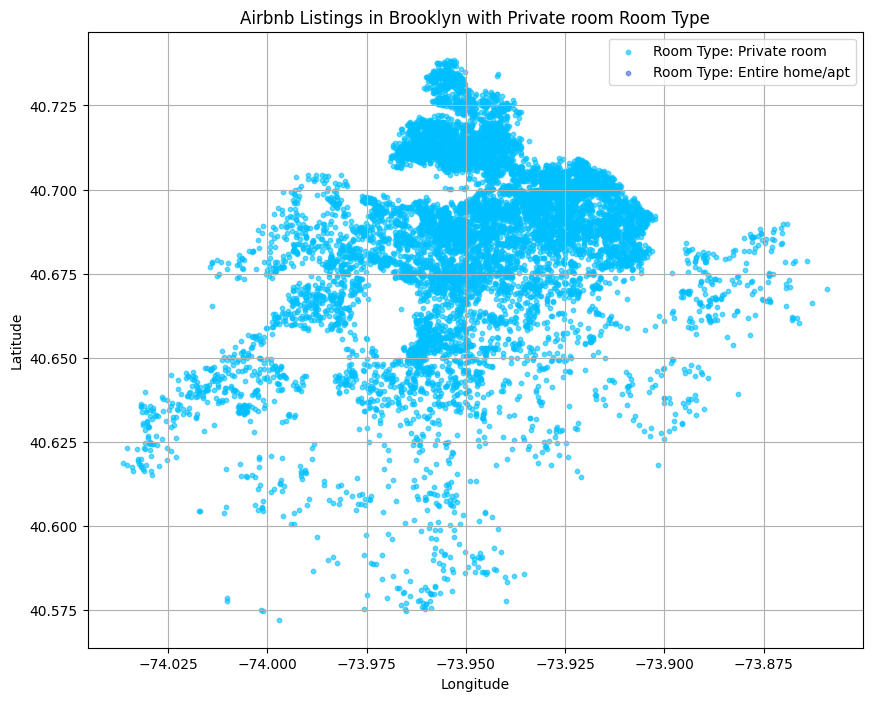

In [30]:
import matplotlib.pyplot as plt
import pandas as pd

# Load the Airbnb data from the CSV file
file_path = 'AB_NYC_2019.csv'  # Replace this with your actual file path
airbnb_data = pd.read_csv(file_path)

# Function to plot markers for the selected borough
def plot_markers(borough, room_type):
    # Filter listings by selected borough and room type
    filtered_listings = airbnb_data[(airbnb_data['neighbourhood_group'] == borough) & 
                                    (airbnb_data['room_type'] == room_type)]

    # Plot the filtered listings on a 2D scatter plot
    plt.figure(figsize=(10, 8))
    
    # Plot points for 'Private room' listings in light blue
    plt.scatter(filtered_listings[filtered_listings['room_type'] == 'Private room']['longitude'], 
                filtered_listings[filtered_listings['room_type'] == 'Private room']['latitude'], 
                s=10, c='deepskyblue', label='Room Type: Private room', alpha=0.6)
    
    # Plot points for 'Entire home/apt' listings in darker blue
    plt.scatter(filtered_listings[filtered_listings['room_type'] == 'Entire home/apt']['longitude'], 
                filtered_listings[filtered_listings['room_type'] == 'Entire home/apt']['latitude'], 
                s=10, c='royalblue', label='Room Type: Entire home/apt', alpha=0.6)
    
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.title(f'Airbnb Listings in {borough} with {room_type} Room Type')
    plt.grid(True)
    plt.legend()
    
    # Save the plot to a file
    plt.savefig('static_map.png')

# Call the function with some sample inputs
plot_markers('Brooklyn', 'Private room')


#### Why this DATASET

* The "AB_NYC_2019.csv" file provides the Airbnb listings data for New York City that are used in the dashboard. This dataset includes detailed data on Airbnb listings, such as their locations, costs, kinds of rooms, amount of reviews, and more. Users may learn more about the wide variety of lodging options accessible in NYC's many neighbourhoods by utilising this dataset.


* The first bit of code builds an interactive dashboard with dynamic filtering options based on room type and borough by using the Airbnb listings dataset. This enables users to examine the spatial distribution of Airbnb listings graphically and comprehend the differences between different neighbourhoods and types of accommodations.

* The first bit of code builds an interactive dashboard with dynamic filtering options based on room type and borough by using the Airbnb listings dataset. This enables users to examine the spatial distribution of Airbnb listings graphically and comprehend the differences between different neighbourhoods and types of accommodations.

* The second bit of code uses Matplotlib to generate a static scatter plot visualisation from the same dataset of Airbnb listings. This method offers a conventional two-dimensional representation of the listings' geographic distribution, making it simple for users to see patterns and trends.

* The final code snippet makes use of Folium to produce a static scatter plot map with interactive markers while still utilising the Airbnb listings dataset. By clicking on the markers, users may examine the specifics of individual listings by combining the ease of use of a static map with the interactive nature of dynamic markers.

* These datasets and visualisation techniques work well together to provide consumers a thorough overview of Airbnb listings in New York City. Through interactive markers, users may drill into specific listing data, examine listings on a map, and examine their distribution using a scatter plot. By using a multifaceted approach, users are better able to plan vacations and manage rental homes by having a better grasp of the NYC Airbnb market.


In [31]:
import folium
from folium.plugins import MarkerCluster
import pandas as pd

# Load the Airbnb data from the CSV file
file_path = 'AB_NYC_2019.csv'  # Replace this with your actual file path
airbnb_data = pd.read_csv(file_path)

# Function to display a scatter plot map for the selected borough and room type
def display_scatter_map(borough, room_type):
    # Filter listings by selected borough and room type
    filtered_listings = airbnb_data[(airbnb_data['neighbourhood_group'] == borough) & 
                                    (airbnb_data['room_type'] == room_type)]
    
    # Determine the center of the map
    center_lat = filtered_listings['latitude'].mean()
    center_lon = filtered_listings['longitude'].mean()

    # Create a map centered on the calculated mean latitude and longitude
    scatter_map = folium.Map(location=[center_lat, center_lon], zoom_start=11, tiles='OpenStreetMap')

    # Create a MarkerCluster object
    marker_cluster = MarkerCluster().add_to(scatter_map)

    # Add markers for each listing
    for idx, listing in filtered_listings.iterrows():
        popup_html = f"""
        <b>Listing Information</b><br>
        <b>Name:</b> {listing["name"]} <br>
        <b>Price:</b> ${listing["price"]} per night<br>
        <b>Room Type:</b> {listing["room_type"]} <br>
        <b>Number of Reviews:</b> {listing["number_of_reviews"]} <br>
        """
        folium.Marker(
            location=[listing["latitude"], listing["longitude"]],
            popup=folium.Popup(popup_html, max_width=300),
            icon=None  # No custom icon, use default marker
        ).add_to(marker_cluster)

    # Display the map
    display(scatter_map)

# Call the function with some sample inputs

display_scatter_map('Brooklyn', 'Shared room')



#### Layers Presented

* To guarantee clarity, usefulness, and user engagement, a number of important factors were taken into account while creating the layers that make up the dashboard.

* The decision to use MarkerClusters for the interactive Folium map layer improves performance by enabling the effective visualisation of a large number of markers and offers a clear depiction of the density of Airbnb listings by borough. Users may readily discover regions with larger listing concentrations by grouping markers near together, which makes it easier to explore and compare different neighbourhoods. Furthermore, by using personalised popup markers, users may engage with the map and receive vital information about each item, which improves the map's usefulness and interactivity.

* A contrasting viewpoint is provided by the Matplotlib static scatter plot visualisation, which presents the same dataset in a conventional 2D style. The scatter plot successfully illustrates the geographical patterns and distribution variations between various lodging categories by segmenting listings according to room type and employing different colours for "Private room" and "Entire home/apt." This design decision makes it easier for consumers to identify patterns and preferences in the kinds of Airbnb listings in various boroughs.

* Lastly, the Folium-created static scatter plot map with interactive markers blends the dynamic markers' interaction with the static map's simplicity. This design decision finds a happy medium between giving consumers a broad overview of listing locations and letting them click on markers to delve further into specific listing data. Users may obtain more information about each listing by using interactive features, such pop-up information windows, which improves their browsing experience overall.

* Ultimately, the goal of these design decisions is to provide consumers a comprehensive understanding of New York City Airbnb listings by presenting various viewpoints and degrees of interaction to accommodate a range of user preferences and analytical requirements.




#### Design choices around interactivity and additional elements of cartography and widgets

* In order to improve user experience and enable insightful examination of Airbnb listing data, a combination of cartographic features and extra interactive components was carefully chosen while designing the dashboard's interactivity.

* Zooming and panning are examples of cartographic components that were included to provide users more freedom to explore and traverse the map at different scales and degrees of information. Zooming in to examine individual listings or out for a more comprehensive overview lets users customise their exploring experience to suit their unique needs and research goals. Similar to this, panning allows users to change the emphasis of the map and investigate other locations in New York City, making it easier to compare and analyse different neighbourhoods spatially.

* Interactive widgets provide the dashboard an additional level of usefulness and engagement in addition to these cartographic features. Users are empowered to dynamically filter the displayed Airbnb listings according to their choices by using the dropdown menus for borough and room type selection. Users may tailor their research and comparison by focusing their inquiry on certain subsets of data thanks to this interactive filtering system. Moreover, real-time feedback is ensured by the map's dynamic updating in reaction to modifications in widget selections, improving user control and promoting fluid exploration.

* The dashboard provides users with a dynamic and immersive exploration experience by combining interactive widgets and cartographic features. This allows users to interactively traverse and analyse data related to Airbnb listings in New York City. Users may customise their exploration experience and get valuable insights from the data by applying particular filters or zooming in to examine individual entries.


